# Tutoriel Pyplot

Matplotlib.pyplot est un ensemble de fonctions de style de commande qui rendent matplotlib fonctionnel comme MATLAB. Chaque fonction pyplot fait quelque changements à une figure: par exemple, crée une figure, crée une zone de traçage dans une figure, trace certaines lignes dans une zone de traçage, décorent le tracé avec des étiquettes, etc. Dans matplotlib.pyplot, différents états sont préservés à travers la fonction Appels, de sorte qu'il conserve la trace des choses comme la figure actuelle et la zone de traçage, et les fonctions de traçage sont dirigés vers les axes actuels (s'il vous plaît noter que "axes" ici et dans la plupart des endroits dans la documentation se réfère à la partie axes d'une figure et non au terme mathématique strict pour plus d'un axe).

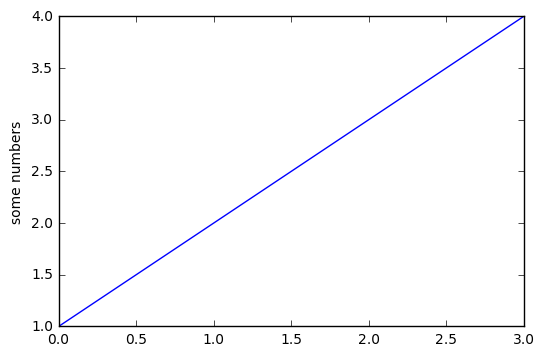

In [1]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4])
plt.ylabel('some numbers')
plt.show()

Vous vous demandez peut-être pourquoi l'axe des x varie de 0 à 3 et l'axe des y de 1 à 4. Si vous fournissez une seule liste ou tableau à la commande plot(), matplotlib suppose que c'est une séquence de valeurs y, et génère automatiquement les valeurs x pour vous. Puisque les gammes python commencent par 0, le vecteur x par défaut a la même longueur que y mais commence par 0. Par conséquent, les données x sont [0,1,2,3].

Plot() est une commande polyvalente, et prendra un nombre arbitraire d'arguments. Par exemple, pour tracer x contre y, vous pouvez exécuter la commande:

In [2]:
plt.plot([1, 2, 3, 4], [1, 4, 9, 16])



Pour chaque x, y paire d'arguments, il y a un troisième argument facultatif qui est la chaîne de format qui indique la couleur et le type de ligne du tracé. Les lettres et les symboles de la chaîne de format sont de MATLAB, et vous concaténez une chaîne de couleur avec une chaîne de style de ligne. La chaîne de format par défaut est 'b-', qui est une ligne bleue pleine. Par exemple, pour vous pouvez tracer dessus des points rouges.

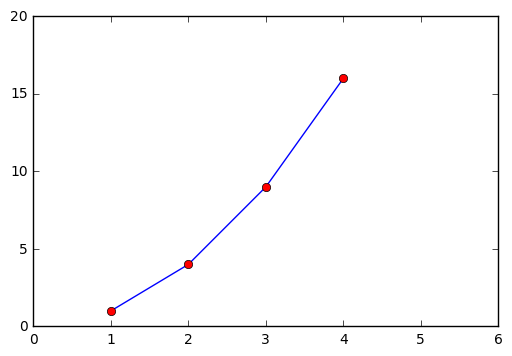

In [3]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4], [1,4,9,16], 'ro')
plt.axis([0, 6, 0, 20])
plt.show()


Consultez la documentation plot() pour obtenir une liste complète des styles de ligne et des chaînes de format. La commande axis() dans l'exemple ci-dessus prend une liste de [xmin, xmax, ymin, ymax] et spécifie la fenêtre des axes.

Si matplotlib était limité à travailler avec des listes, il serait assez inutile pour le traitement numérique. Généralement, vous utiliserez des tableaux numpy. En fait, toutes les séquences sont converties en matrices numpy en interne. L'exemple ci-dessous illustre un traçage de plusieurs lignes avec différents styles de format dans une commande à l'aide de tableaux.

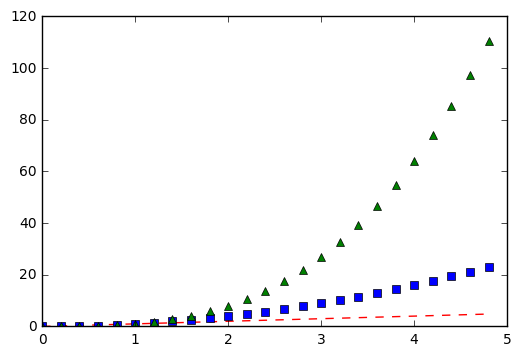

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Temps échantillonné uniformément à des intervalles de 200 ms
t = np.arange(0., 5., 0.2)

# Tirets rouges, carrés bleus et triangles verts
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()

# Travailler avec plusieurs figures et axes
MATLAB, et pyplot, ont le concept de la figure actuelle et les axes actuels. Toutes les commandes de traçage s'appliquent aux axes actuels. La fonction gca() renvoie les axes actuels (une instance matplotlib.axes.Axes), et gcf() renvoie la figure courante (instance matplotlib.figure.Figure). Normalement, vous n'avez pas à vous inquiéter à ce sujet, car il est tout pris en charge dans les coulisses. Ci-dessous un script pour créer deux sous-tracés.

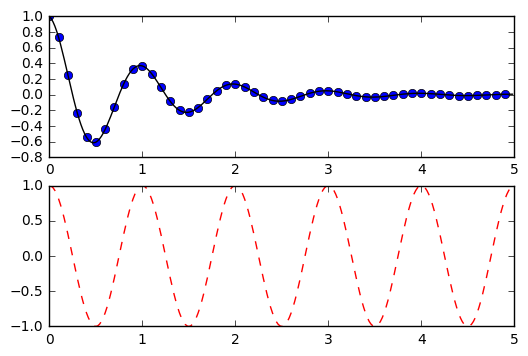

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def f(t):
    return np.exp(-t) * np.cos(2*np.pi*t)

t1 = np.arange(0.0, 5.0, 0.1)
t2 = np.arange(0.0, 5.0, 0.02)

plt.figure(1)
plt.subplot(211)
plt.plot(t1, f(t1), 'bo', t2, f(t2), 'k')

plt.subplot(212)
plt.plot(t2, np.cos(2*np.pi*t2), 'r--')
plt.show()


La commande figure() est facultative car la figure (1) sera créée par défaut, tout comme une sous-trame (111) sera créée par défaut si vous ne spécifiez pas manuellement d'axes. La commande subplot () spécifie numrows, numcols, fignum où fignum varie de 1 à numrows * numcols. Les virgules de la sous-commande sont facultatives si numbres * numcols <10. Ainsi, la sous-trame (211) est identique à la sous-trame (2, 1, 1). Vous pouvez créer un nombre arbitraire de sous-tracés et d'axes. Si vous voulez placer un axe manuellement, c'est-à-dire pas sur une grille rectangulaire, utilisez la commande axes (), qui vous permet de spécifier l'emplacement en tant qu'axes ([left, bottom, width, height]) où toutes les valeurs sont fractionnaires (0 à 1). Voir pylab_examples exemple de code: axes_demo.py pour un exemple de placement manuel d'axes et pylab_examples exemple de code: subplots_demo.py pour un exemple avec beaucoup de sous-tracés.

Vous pouvez créer plusieurs figures en utilisant plusieurs chiffres () avec un numéro de chiffre croissant. Bien sûr, chaque figure peut contenir autant d'axes et de sous-traits que votre cœur le désire:

In [7]:
import matplotlib.pyplot as plt
plt.figure(1)                # La première figure
plt.subplot(211)             # Le premier subplot de la première figure
plt.plot([1, 2, 3])
plt.subplot(212)             # Le second subplot de la deuxième figure
plt.plot([4, 5, 6])


plt.figure(2)                # une deuxième figure
plt.plot([4, 5, 6])          # Création d'un subplot(111) par défaut

plt.figure(1)                # figure 1 courant; subplot(212) encore courant
plt.subplot(211)             # Création du subplot(211) dans la figure1 courante
plt.title('Easy as 1, 2, 3') # titre du subplot 211


Vous pouvez effacer la figure actuelle avec clf () et les axes courants avec cla (). Si vous trouvez ennuyeux que les états (en particulier l'image, la figure et les axes actuels) sont maintenus pour vous dans les coulisses, ne désespérez pas: il s'agit juste d'un wrapper mince état autour d'une API orientée objet, que vous pouvez utiliser à la place Voir le didacticiel de l'artiste)

Si vous faites beaucoup de chiffres, vous devez être conscient d'une chose de plus: la mémoire requise pour une figure n'est pas complètement libérée jusqu'à ce que la figure soit explicitement fermée avec close (). Supprimer toutes les références à la figure et / ou utiliser le gestionnaire de fenêtres pour tuer la fenêtre dans laquelle la figure apparaît à l'écran, ne suffit pas, parce que pyplot maintient des références internes jusqu'à ce que close () soit appelé.

# Travailler avec du texte
La commande text () peut être utilisée pour ajouter du texte dans un emplacement arbitraire, et xlabel (), ylabel () et title () sont utilisés pour ajouter du texte dans les emplacements indiqués (voir introduction de texte pour un exemple plus détaillé)

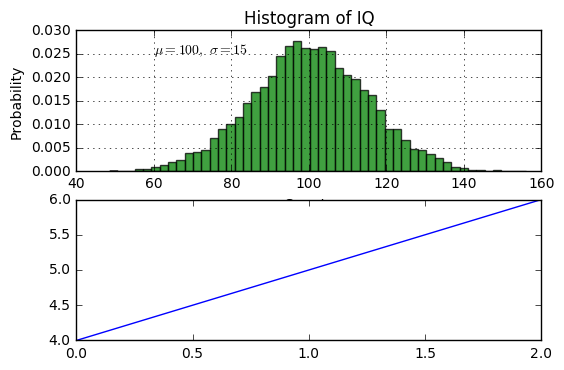

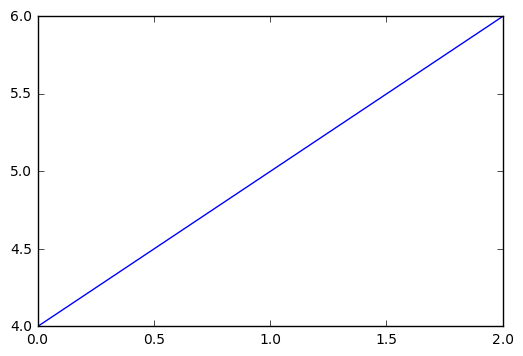

In [8]:
import numpy as np
import matplotlib.pyplot as plt

mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# histogramme des données
n, bins, patches = plt.hist(x, 50, normed=1, facecolor='g', alpha=0.75)


plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

All of the text() commands return an matplotlib.text.Text instance. Just as with with lines above, you can customize the properties by passing keyword arguments into the text functions or using setp():

In [9]:
t = plt.xlabel('my data', fontsize=14, color='red')


Ces propriétés sont traitées plus en détail dans les propriétés et la disposition du texte.

## Utilisation d'expressions mathématiques dans le texte
Matplotlib accepte les expressions d'équation TeX dans n'importe quelle expression de texte. Par exemple, pour écrire l'expression dans le titre, vous pouvez écrire une expression TeX entourée de signes de dollar:

In [10]:
plt.title(r'$\sigma_i=15$')

Le r précédant la chaîne de titre est important - il signifie que la chaîne est une chaîne brute et ne pas traiter les backslashes comme python échappe. Matplotlib dispose d'un analyseur d'expression TeX intégré et d'un moteur de mise en page, et envoie ses propres polices mathématiques - pour plus de détails, voir Écrire des expressions mathématiques. Ainsi, vous pouvez utiliser du texte mathématique entre plates-formes sans avoir besoin d'une installation TeX. Pour ceux qui ont installé LaTeX et dvipng, vous pouvez également utiliser LaTeX pour formater votre texte et incorporer la sortie directement dans vos chiffres d'affichage ou postscript enregistré - voir Rendu texte avec LaTeX.

## Annoter le texte
Les utilisations de la commande text () de base ci-dessus placent le texte à une position arbitraire sur les Axes. Une utilisation courante pour le texte est d'annoter une caractéristique du tracé, et la méthode annotate () fournit une fonctionnalité d'assistance pour faciliter les annotations. Dans une annotation, il ya deux points à considérer: l'emplacement étant annoté représenté par l'argument xy et l'emplacement du texte xytext. Ces deux arguments sont (x, y) tuples.

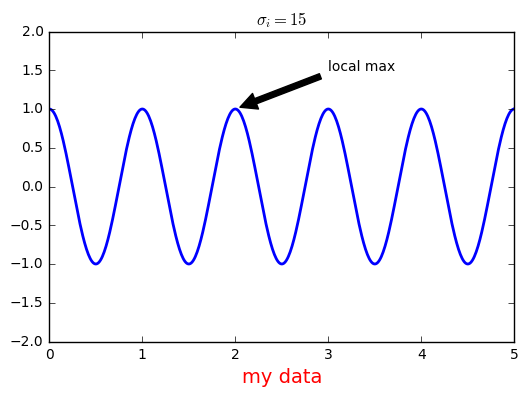

In [11]:
import numpy as np
import matplotlib.pyplot as plt

ax = plt.subplot(111)

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = plt.plot(t, s, lw=2)

plt.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )

plt.ylim(-2,2)
plt.show()


Dans cet exemple de base, les positions xy (pointe de flèche) et xytext (emplacement de texte) sont dans les coordonnées de données. Il existe une variété d'autres systèmes de coordonnées que l'on peut choisir - voir Annoter le texte et Annoter des axes pour plus de détails. Vous trouverez d'autres exemples dans pylab_examples exemple de code: annotation_demo.py.


# Logarithmique et autre axe non linéaire
Matplotlib.pyplot supporte non seulement les échelles linéaires, mais aussi les échelles logarithmiques et logiques. Ceci est communément utilisé si les données couvrent de nombreux ordres de grandeur. Changer l'échelle d'un axe est facile:

Plt.xscale ('log')
Un exemple de quatre parcelles avec les mêmes données et différentes échelles pour l'axe y est illustré ci-dessous.

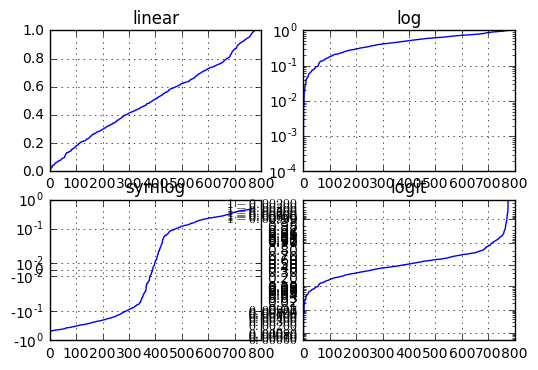

In [12]:
import numpy as np
import matplotlib.pyplot as plt

#Créer quelques données dans l'intervalle] 0, 1 [
y = np.random.normal(loc=0.5, scale=0.4, size=1000)
y = y[(y > 0) & (y < 1)]
y.sort()
x = np.arange(len(y))

# Affichage avec différentes échelles d'axes
plt.figure(1)

# linéaire
plt.subplot(221)
plt.plot(x, y)
plt.yscale('linear')
plt.title('linear')
plt.grid(True)


# logarithmique
plt.subplot(222)
plt.plot(x, y)
plt.yscale('log')
plt.title('log')
plt.grid(True)


# logarithme symétrique
plt.subplot(223)
plt.plot(x, y - y.mean())
plt.yscale('symlog', linthreshy=0.05)
plt.title('symlog')
plt.grid(True)

# logit
plt.subplot(224)
plt.plot(x, y)
plt.yscale('logit')
plt.title('logit')
plt.grid(True)

plt.show()

Il est également possible d'ajouter votre propre échelle

In [ ]:
